## Problem Statement
The goal of this project is to develop a robust machine learning model that assigns a credit score (0 to 1000) to each wallet address interacting with the Aave V2 DeFi protocol. This score reflects the user's behavior and reliability based solely on their on-chain transaction history.

The model should identify and quantify behavioral patterns (e.g., responsible usage vs. risky or bot-like activity) based on transaction-level interactions such as deposit, borrow, repay, redeemunderlying, and liquidationcall.

### Analytical Goal
- Clean and preprocess raw transaction-level data from Aave V2 protocol.

- Extract meaningful behavioral features from user-wallet interactions.

- Build a machine learning model to assign credit scores to wallets.

- Interpret and explain wallet behavior across score ranges for transparency.

## Dataset Column Descriptions
| Column Name   | Description                                                           |
| ------------- | --------------------------------------------------------------------- |
| `_id`         | Internal MongoDB-style document ID (not required for analysis)        |
| `userWallet`  | The unique blockchain wallet address performing the transaction       |
| `network`     | The blockchain network used (e.g., `polygon`)                         |
| `protocol`    | DeFi protocol name (e.g., `aave_v2`)                                  |
| `txHash`      | Unique transaction hash on the blockchain                             |
| `logId`       | Unique log identifier for the event (often matches txHash)            |
| `timestamp`   | UNIX timestamp of the transaction (will be converted to datetime)     |
| `blockNumber` | Block number on the chain when the transaction occurred               |
| `action`      | The action performed (e.g., `deposit`, `borrow`, `repay`, etc.)       |
| `actionData`  | Nested dictionary containing transaction details (amount, type, etc.) |
| `__v`         | Internal versioning column (can be dropped)                           |
| `createdAt`   | Timestamp when this record was created in the backend system          |
| `updatedAt`   | Timestamp when this record was last modified                          |


## Import the libraries and load the data

In [1]:
import os
print(os.getcwd())

C:\Users\Poornima Kc\Documents\fastapi_project


In [2]:
file_path = 'user-wallet-transactions.json'

import json
import pandas as pd

# Open and load JSON
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

df.head()

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


## Dataset Overview
#### The dataset consists of raw blockchain activity data, likely obtained from a DeFi or crypto protocol, with the following key columns:

| Column Name  | Description                                                               |
| ------------ | ------------------------------------------------------------------------- |
| `userWallet` | Unique wallet address of the user involved in the transaction             |
| `timestamp`  | UNIX timestamp of when the action occurred                                |
| `action`     | The type of activity performed (e.g., `deposit`, `redeem`, etc.)          |
| `actionData` | Nested dictionary that holds details like transaction `type` and `amount` |


In [3]:
# Drop unnecessary columns
df = df[['userWallet', 'timestamp', 'action', 'actionData']]

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Extract amount from actionData
df['amount'] = df['actionData'].apply(lambda x: float(x.get('amount', 0)))

# Clean up: remove rows with missing wallet or amount
df = df[df['userWallet'].notna()]
df = df[df['amount'] > 0]

df.head()

,userWallet,timestamp,action,actionData,amount
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,2021-08-17 05:29:26,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",2.000000e+09
1,0x000000000051d07a4fb3bd10121a343d85818da6,2021-05-20 15:36:53,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",1.450000e+20
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2021-07-24 09:28:33,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",1.000000e+15
3,0x000000000096026fb41fc39f9875d164bd82e2dc,2021-07-31 23:15:18,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",4.000000e+15
4,0x0000000000e189dd664b9ab08a33c4839953852c,2021-04-19 15:25:07,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",5.015480e+05


## FEATURE ENGINEERING: Wallet-level dataset
We’ll group all transactions by wallet and compute the following features:
| Feature                  | Meaning                       |
| ------------------------ | ----------------------------- |
| `num_transactions`       | Total no. of actions          |
| `total_amount`           | Sum of all amounts            |
| `avg_transaction_amount` | Average tx size               |
| `num_deposits`           | Count of 'deposit'            |
| `num_borrows`            | Count of 'borrow'             |
| `num_repayments`         | Count of 'repay'              |
| `num_redeems`            | Count of 'redeemunderlying'   |
| `num_liquidations`       | Count of 'liquidationcall'    |
| `active_days`            | No. of days wallet was active |
| `days_between_tx`        | Mean days between tx          |


In [4]:
# Add action dummy columns
df['date'] = df['timestamp'].dt.date

agg_df = df.groupby('userWallet').agg(
    num_transactions=('action', 'count'),
    total_amount=('amount', 'sum'),
    avg_transaction_amount=('amount', 'mean'),
    num_deposits=('action', lambda x: (x == 'deposit').sum()),
    num_borrows=('action', lambda x: (x == 'borrow').sum()),
    num_repayments=('action', lambda x: (x == 'repay').sum()),
    num_redeems=('action', lambda x: (x == 'redeemunderlying').sum()),
    num_liquidations=('action', lambda x: (x == 'liquidationcall').sum()),
    active_days=('date', lambda x: x.nunique()),
)

# Days between transactions
first_last = df.groupby('userWallet')['timestamp'].agg(['min', 'max'])
first_last['days_between_tx'] = (first_last['max'] - first_last['min']).dt.days + 1

# Merge
wallet_df = agg_df.merge(first_last[['days_between_tx']], left_index=True, right_index=True)

# Reset index
wallet_df = wallet_df.reset_index()
wallet_df.head()

,userWallet,num_transactions,total_amount,avg_transaction_amount,num_deposits,num_borrows,num_repayments,num_redeems,num_liquidations,active_days,days_between_tx
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,2.000000e+09,2.000000e+09,1,0,0,0,0,1,1
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,1.450000e+20,1.450000e+20,1,0,0,0,0,1,1
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,5.000000e+15,2.500000e+15,2,0,0,0,0,2,8
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,4.835297e+18,2.844292e+17,0,0,0,17,0,8,130
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,1.735192e+23,4.348853e+20,250,15,4,130,0,104,133


## Feature Scaling and Outlier Handling
Normalize the feature values to bring all features to the same scale. Also, detect and optionally remove outliers that could skew clustering.

### Features Used for Clustering:
We will use the following numerical features:
- num_transactions

- total_amount
- avg_transaction_amount

- num_deposits

- num_borrows

- num_repayments

- num_redeems

- num_liquidations

- active_days

- days_between_tx

## Scoring Wallets Using Rule-Based System

In this step, we assign a credit score (0-100) to each wallet based on rule-based logic using transaction patterns like:
- Number of transactions
- Average transaction value
- Deposit/borrow behavior
- Active days
- Liquidations

The scoring system is simple and interpretable, useful for initial analysis or when model training is not viable.

In [5]:
def rule_based_score(row):
    score = 0
    if row['num_transactions'] > 100:
        score += 20
    if row['avg_transaction_amount'] > 1e18:
        score += 20
    if row['num_deposits'] > 50:
        score += 15
    if row['num_borrows'] < 5:
        score += 15
    if row['num_liquidations'] == 0:
        score += 10
    if row['active_days'] > 30:
        score += 20
    return score

wallet_df['credit_score'] = wallet_df.apply(rule_based_score, axis=1)
wallet_df[['userWallet', 'credit_score']].head()


,userWallet,credit_score
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,25
1,0x000000000051d07a4fb3bd10121a343d85818da6,45
2,0x000000000096026fb41fc39f9875d164bd82e2dc,25
3,0x0000000000e189dd664b9ab08a33c4839953852c,25
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,85


### 🔢 Credit Score Segmentation

We segment users based on their `credit_score` using the following logic:

| Score Range | Segment |
|-------------|---------|
| 0–39        | Low     |
| 40–69       | Medium  |
| 70–100      | High    |

After merging the scored data with the transaction-level records, we added a `credit_segment` column to categorize each wallet:


In [6]:
# Let's say this is our scored DataFrame from previous step
df_scores = pd.DataFrame({
    'userWallet': [
        '0x00000000001accfa9cef68cf5371a23025b6d4b6',
        '0x000000000051d07a4fb3bd10121a343d85818da6',
        '0x000000000096026fb41fc39f9875d164bd82e2dc',
        '0x0000000000e189dd664b9ab08a33c4839953852c',
        '0x0000000002032370b971dabd36d72f3e5a7bf1ee'
    ],
    'credit_score': [25, 45, 25, 25, 85]
})

# Merge score into it
df = df.merge(df_scores, on='userWallet', how='left')

# Now apply segmentation
def segment_score(score):
    if score < 40:
        return "Low"
    elif score < 70:
        return "Medium"
    else:
        return "High"

df['credit_segment'] = df['credit_score'].apply(segment_score)

print(df[['userWallet', 'credit_score', 'credit_segment']].head())


                                   userWallet  credit_score credit_segment
0  0x00000000001accfa9cef68cf5371a23025b6d4b6          25.0            Low
1  0x000000000051d07a4fb3bd10121a343d85818da6          45.0         Medium
2  0x000000000096026fb41fc39f9875d164bd82e2dc          25.0            Low
3  0x000000000096026fb41fc39f9875d164bd82e2dc          25.0            Low
4  0x0000000000e189dd664b9ab08a33c4839953852c          25.0            Low


## Customer Segmentation using KMeans Clustering based on Financial and Behavioral Features

We applied KMeans clustering (k=3) to group wallets based on their transaction and behavioral metrics. This unsupervised approach helps us segment wallets into meaningful groups like:
- Low Risk: Consistent, high activity, good repayment
- Medium Risk: Moderate activity, balanced usage
- High Risk: Irregular behavior, fewer repayments, high borrow/liquidation

These segments can guide further credit decisions or system flags.


In [7]:
for name in dir():
    obj = globals()[name]
    if hasattr(obj, 'columns'):
        print(f"{name} ➤ {obj.columns.tolist()}")

_ ➤ ['userWallet', 'credit_score']
_2 ➤ ['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId', 'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt', 'updatedAt']
_3 ➤ ['userWallet', 'timestamp', 'action', 'actionData', 'amount']
_4 ➤ ['userWallet', 'num_transactions', 'total_amount', 'avg_transaction_amount', 'num_deposits', 'num_borrows', 'num_repayments', 'num_redeems', 'num_liquidations', 'active_days', 'days_between_tx']
_5 ➤ ['userWallet', 'credit_score']
__ ➤ ['userWallet', 'num_transactions', 'total_amount', 'avg_transaction_amount', 'num_deposits', 'num_borrows', 'num_repayments', 'num_redeems', 'num_liquidations', 'active_days', 'days_between_tx']
___ ➤ ['userWallet', 'timestamp', 'action', 'actionData', 'amount']
agg_df ➤ ['num_transactions', 'total_amount', 'avg_transaction_amount', 'num_deposits', 'num_borrows', 'num_repayments', 'num_redeems', 'num_liquidations', 'active_days']
df ➤ ['userWallet', 'timestamp', 'action', 'actionData', 'amount', 'd

In [8]:
features = [
    'num_transactions',
    'total_amount',
    'avg_transaction_amount',
    'num_deposits',
    'num_borrows',
    'num_repayments',
    'num_redeems',
    'num_liquidations',
    'active_days',
    'days_between_tx'
]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(wallet_df[features])


In [9]:
# Apply KMeans Clustering
from sklearn.cluster import KMeans

# Choose number of clusters
k = 3  

# Train KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
wallet_df['cluster'] = kmeans.fit_predict(scaled_features)

In [10]:
# Map Cluster Numbers to Segment Labels
cluster_map = {
    0: 'Medium Risk',
    1: 'High Risk',
    2: 'Low Risk'
}

# Map cluster labels
wallet_df['customer_segment'] = wallet_df['cluster'].map(cluster_map)

In [11]:
wallet_df[['userWallet', 'credit_score', 'cluster', 'customer_segment']].head()

,userWallet,credit_score,cluster,customer_segment
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,25,0,Medium Risk
1,0x000000000051d07a4fb3bd10121a343d85818da6,45,0,Medium Risk
2,0x000000000096026fb41fc39f9875d164bd82e2dc,25,0,Medium Risk
3,0x0000000000e189dd664b9ab08a33c4839953852c,25,0,Medium Risk
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,85,2,Low Risk


## Plot the Clusters (Visualization)

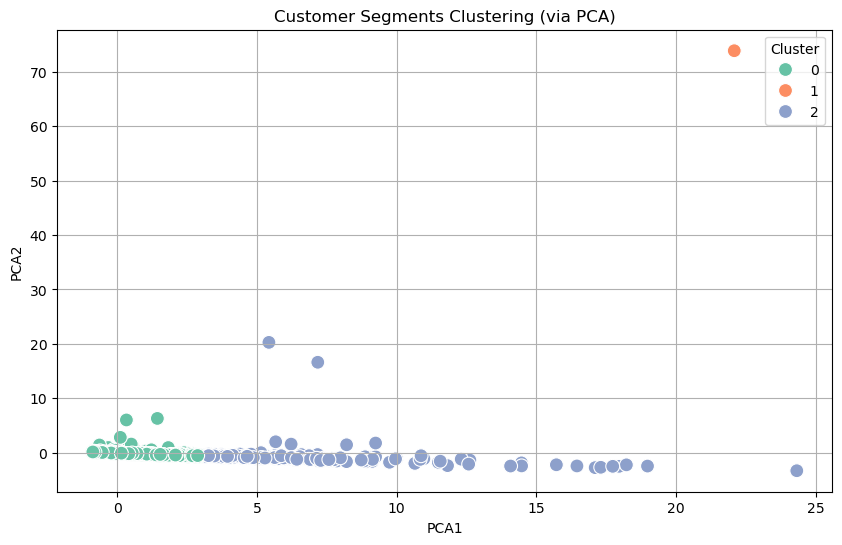

In [12]:
# Let’s plot the clusters using PCA to reduce dimensions:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features = ['num_transactions', 'total_amount', 'avg_transaction_amount', 
            'num_deposits', 'num_borrows', 'num_repayments', 
            'num_redeems', 'num_liquidations', 'active_days', 'days_between_tx']

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wallet_df[features])

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# Create a DataFrame for plotting
plot_df = pd.DataFrame()
plot_df['PCA1'] = reduced_data[:, 0]
plot_df['PCA2'] = reduced_data[:, 1]
plot_df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments Clustering (via PCA)')
plt.grid(True)
plt.show()

In [13]:
import joblib
feature_columns = ['num_transactions', 'total_amount', 'avg_transaction_amount', 
            'num_deposits', 'num_borrows', 'num_repayments', 
            'num_redeems', 'num_liquidations', 'active_days', 'days_between_tx'] 
joblib.dump(feature_columns, 'features.pkl')

['features.pkl']

### User Segmentation Using KMeans Clustering

- The PCA scatter plot visualizes users projected into 2D space for better interpretability.
- Users are grouped into **three distinct clusters** using KMeans, representing unique behavioral or purchasing patterns.
- This clustering can guide **personalized marketing strategies**, loyalty programs, and product recommendations based on the segment characteristics.

## Save the Results (Model + Output File)

In [14]:
wallet_df.to_csv("clustered_wallets.csv", index=False)    #Save Output CSV

In [15]:
# Save the Model (KMeans + Scaler)
import joblib

# Save KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']